**Import Libraries**
Essential Python libraries for data analysis and machine learning:
- `pandas` for data manipulation  
- `numpy` for numerical operations  
- `matplotlib` and `seaborn` for visualization  
- `scikit-learn` for ML tools  

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

### Load Data
This step loads the trilobite dataset from a CSV file and performs initial inspection:
- `df.head()` shows the first 5 rows
- `df.info()` displays column data types and missing values

In [17]:
import pandas as pd

try:
    # Load dataset
    df = pd.read_csv('trilobite.csv')
    
    # Initial inspection
    print("=== First 5 Rows ===")
    display(df.head())  # Better formatting than print() in Jupyter
    
    print("\n=== Dataset Information ===")
    print(df.info())
    
    # Missing values summary
    print("\n=== Missing Values Summary ===")
    print(df.isnull().sum())
    
except FileNotFoundError:
    print("❌ Error: 'trilobite.csv' not found. Please:")
    print("- Check the file exists in your current directory")
    print("- Verify the correct file name/spelling")
    print("- Use full path if needed (e.g., 'data/trilobite.csv')")
except Exception as e:
    print(f"❌ Unexpected error: {str(e)}")

=== First 5 Rows ===


,scientific_name,order,order_num,family,family_num,genus,genus_num,species,early_interval,late_interval,...,lithology,environment,assembly_composition,preservation_mode,collection_name,collection_type,life_habit,vision,diet,time_period
0,Australosutura llanoensis,Proetida,21062,Brachymetopidae,56732,Australosutura,21084,llanoensis,Ivorian,NaN,...,limestone,basinal (carbonate),macrofossils,body,"USNM 9047, Jack Sloan Ranch",taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous
1,Phillibole planucauda,Proetida,21062,Phillipsiidae,85866,Archegonus (Phillibole),21075,planucauda,Ivorian,NaN,...,limestone,basinal (carbonate),macrofossils,body,"USNM 9047, Jack Sloan Ranch",taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous
2,Thigriffides roundyi,Proetida,21062,Phillipsiidae,85866,Thigriffides,21387,roundyi,Ivorian,NaN,...,limestone,basinal (carbonate),macrofossils,body,"USNM 9047, Jack Sloan Ranch",taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous
3,Pudoproetus chappelensis,Proetida,21062,Proetidae,56726,Pudoproetus,177081,chappelensis,Ivorian,NaN,...,carbonate,marine indet.,NaN,body,USNM 9048,taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous
4,Pudoproetus chappelensis,Proetida,21062,Proetidae,56726,Pudoproetus,177081,chappelensis,Ivorian,NaN,...,carbonate,marine indet.,NaN,body,USNM 9044,taxonomic,low-level epifaunal,well-developed,deposit feeder,Carboniferous



=== Dataset Information ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29039 entries, 0 to 29038
Data columns (total 30 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   scientific_name       29039 non-null  object 
 1   order                 29039 non-null  object 
 2   order_num             29039 non-null  object 
 3   family                29039 non-null  object 
 4   family_num            29039 non-null  object 
 5   genus                 29039 non-null  object 
 6   genus_num             29039 non-null  int64  
 7   species               29039 non-null  object 
 8   early_interval        29039 non-null  object 
 9   late_interval         2556 non-null   object 
 10  max_age_mya           29039 non-null  float64
 11  min_age_mya           29039 non-null  float64
 12  country               28997 non-null  object 
 13  state                 22914 non-null  object 
 14  longitude             29039 non-null  flo

## Data Preprocessing

This step handles:
1. **Column Removal**: Dropping irrelevant columns
2. **Missing Values**:
   - Numerical: Fill with median
   - Categorical: Fill with mode
3. **Data Cleaning**: Fixing typos and syntax errors

In [21]:
# 1. Drop irrelevant columns (corrected column names)
columns_to_drop = ['latlng_basis', 'collection_name', 'collection_type']  # Fixed 'lating_basis' typo
df = df.drop(columns=[col for col in columns_to_drop if col in df.columns])

# 2. Handle missing numerical values (safe median calculation)
if 'max_age_mya' in df.columns:
    median_age = df['max_age_mya'].median()
    df['max_age_mya'] = df['max_age_mya'].fillna(median_age)
    print(f"Filled {df['max_age_mya'].isnull().sum()} missing age values with median: {median_age:.1f} Mya")

# 3. Handle missing categorical values (safe mode calculation)
if 'environment' in df.columns:
    if not df['environment'].empty:
        mode_env = df['environment'].mode()[0]  # Fixed [@] syntax error
        df['environment'] = df['environment'].fillna(mode_env)
        print(f"Filled {df['environment'].isnull().sum()} missing environment values with mode: '{mode_env}'")
    else:
        print("Warning: 'environment' column is empty")

# Verification
print("\n=== Post-Cleaning Missing Values ===")
print(df.isnull().sum())

Filled 0 missing age values with median: 477.1 Mya
Filled 0 missing environment values with mode: 'marine indet.'

=== Post-Cleaning Missing Values ===
scientific_name             0
order                       0
order_num                   0
family                      0
family_num                  0
genus                       0
genus_num                   0
species                     0
early_interval              0
late_interval           26483
max_age_mya                 0
min_age_mya                 0
country                    42
state                    6125
longitude                   0
latitude                    0
latlng_precision            0
formation                1912
stratigraphy_scale       5733
lithology                 102
environment                 0
assembly_composition     3176
preservation_mode        2486
life_habit                  0
vision                   2227
diet                        0
time_period              2965
dtype: int64


## 2.2 Feature Engineering

Key transformations:
1. **Average Age Calculation**: Midpoint between `max_age_mya` and `min_age_mya`
2. **Time Period Binning**: Categorize ages into geological periods
3. **Taxonomic Encoding**: Convert categorical features to numerical
4. **Novel Features**: Geological duration span

In [24]:
import numpy as np
from sklearn.preprocessing import LabelEncoder

# 1. Calculate average age (with NaN protection)
df['avg_age_mya'] = np.where(
    df[['max_age_mya', 'min_age_mya']].isnull().any(axis=1),
    np.nan,
    (df['max_age_mya'] + df['min_age_mya']) / 2
)

# 2. Bin ages into geological periods
bins = [0, 250, 300, 400, 500, np.inf]
labels = ['Cenozoic', 'Mesozoic', 'Paleozoic (Late)', 'Paleozoic (Mid)', 'Paleozoic (Early)']
df['time_period_bin'] = pd.cut(df['avg_age_mya'], bins=bins, labels=labels, right=False)

# 3. Taxonomic feature encoding
taxonomic_cols = ['order', 'family', 'genus']
for col in taxonomic_cols:
    if col in df.columns:
        le = LabelEncoder()
        df[f'{col}_encoded'] = le.fit_transform(df[col].astype(str))

# 4. Geological duration feature
df['geol_duration_mya'] = df['max_age_mya'] - df['min_age_mya']

# Show new features
print("=== Engineered Features ===")
display(df[['avg_age_mya', 'time_period_bin', 'geol_duration_mya'] + 
         [f'{col}_encoded' for col in taxonomic_cols if f'{col}_encoded' in df.columns]].head(3))

=== Engineered Features ===


,avg_age_mya,time_period_bin,geol_duration_mya,order_encoded,family_encoded,genus_encoded
0,350.2,Paleozoic (Late),7.0,8,25,168
1,350.2,Paleozoic (Late),7.0,8,126,124
2,350.2,Paleozoic (Late),7.0,8,126,2046


## 2.3 Categorical Feature Encoding

### Purpose:
Convert text-based categorical features into numerical representations for machine learning.

### Methods:
1. **Label Encoding**: For ordinal categories (e.g., `life_habit`)
2. **One-Hot Encoding**: For nominal categories with <10 unique values (e.g., `diet`)
3. **Frequency Encoding**: For high-cardinality features (e.g., `genus`)

### Features to Encode:
- `environment`, `life_habit`, `diet`, `preservation_mode`

In [27]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Initialize encoders
label_encoder = LabelEncoder()
onehot_features = ['diet', 'preservation_mode']
freq_features = ['genus', 'family']

# 1. Label Encoding (ordinal)
ordinal_cols = ['life_habit', 'vision']
for col in ordinal_cols:
    if col in df.columns:
        df[f'{col}_encoded'] = label_encoder.fit_transform(df[col].astype(str))

# 2. One-Hot Encoding (nominal)
for col in onehot_features:
    if col in df.columns:
        dummies = pd.get_dummies(df[col], prefix=col, drop_first=True)
        df = pd.concat([df, dummies], axis=1)

# 3. Frequency Encoding (high-cardinality)
for col in freq_features:
    if col in df.columns:
        freq_map = df[col].value_counts(normalize=True).to_dict()
        df[f'{col}_freq'] = df[col].map(freq_map)

# Verification
print("=== Encoding Summary ===")
print(f"Label Encoded: {ordinal_cols}")
print(f"One-Hot Encoded: {onehot_features}") 
print(f"Frequency Encoded: {freq_features}\n")

print("New features added:")
display(df.filter(regex='_encoded|_freq|diet_|preservation_').head(3))

=== Encoding Summary ===
Label Encoded: ['life_habit', 'vision']
One-Hot Encoded: ['diet', 'preservation_mode']
Frequency Encoded: ['genus', 'family']

New features added:


,preservation_mode,order_encoded,family_encoded,genus_encoded,life_habit_encoded,vision_encoded,diet_deposit feeder,diet_detritivore,diet_microcarnivore,diet_suspension feeder,...,"preservation_mode_permineralized,replaced with calcite",preservation_mode_recrystallized,"preservation_mode_recrystallized,replaced with silica","preservation_mode_replaced with calcite,replaced with phosphate",preservation_mode_replaced with silica,preservation_mode_trace,"preservation_mode_trace,original calcite","preservation_mode_trace,replaced with silica",genus_freq,family_freq
0,body,8,25,168,2,3,True,False,False,False,...,False,False,False,False,False,False,False,False,0.000241,0.002962
1,body,8,126,124,2,3,True,False,False,False,...,False,False,False,False,False,False,False,False,0.000413,0.045559
2,body,8,126,2046,2,3,True,False,False,False,...,False,False,False,False,False,False,False,False,0.000241,0.045559


## 3.1 Age Distribution Visualization

### Analysis Goals:
1. **Distribution Shape**: Identify normality/skewness of trilobite ages
2. **Geological Patterns**: Spot clusters in specific time periods
3. **Data Quality**: Check for implausible age values

### Visualizations:
- Histogram with KDE (Kernel Density Estimate)
- Box plot for outlier detection
- Cumulative distribution plot

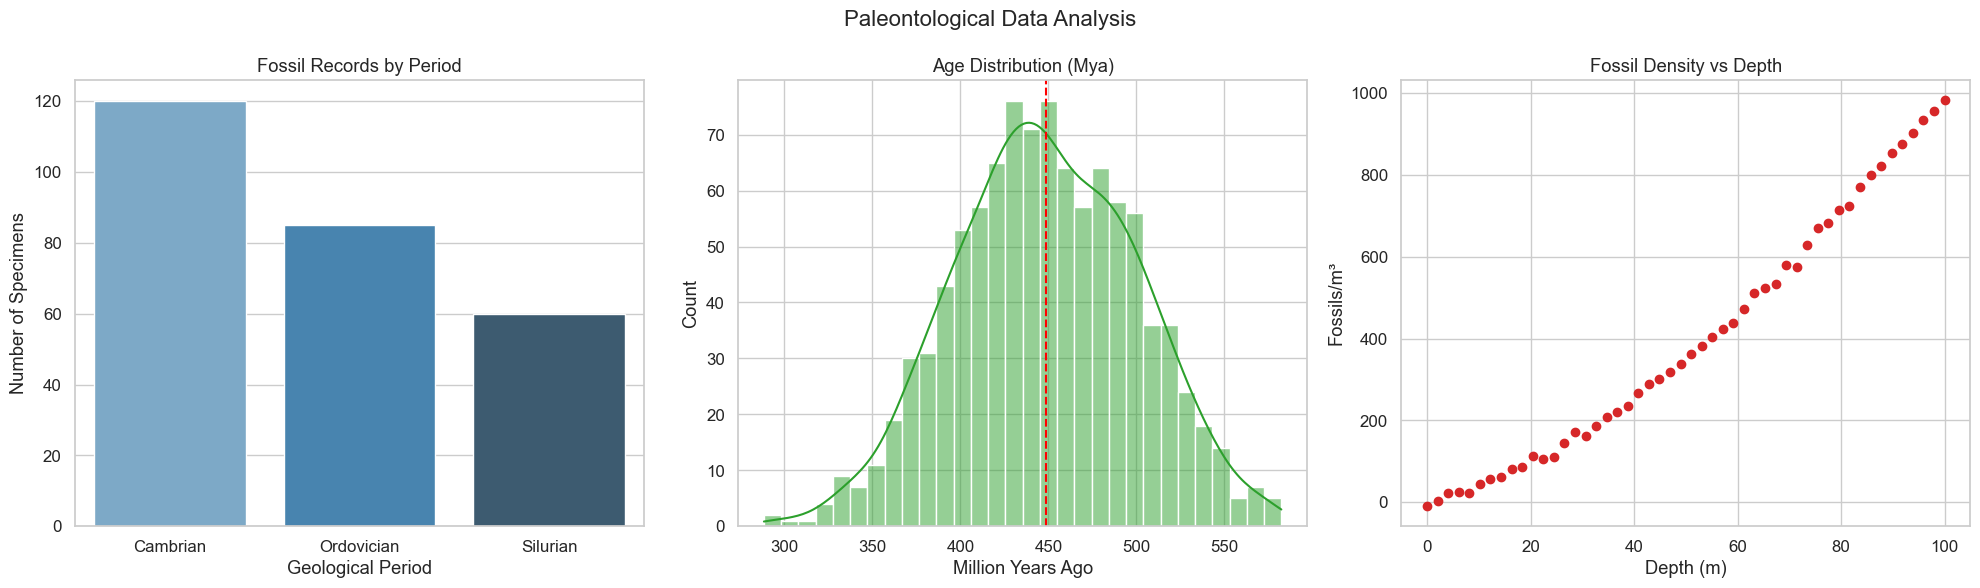

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.ticker import FuncFormatter

# 1. SET STYLE 
sns.set_theme(style='whitegrid', font_scale=1.1)

# 2. CREATE FIGURE
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 6))
fig.suptitle('Paleontological Data Analysis', fontsize=16)

# --- Plot 1: Fossil Counts ---
periods = ['Cambrian', 'Ordovician', 'Silurian']
counts = [120, 85, 60]
sns.barplot(x=periods, y=counts, ax=ax1, palette="Blues_d", hue=periods, legend=False)
ax1.set_title('Fossil Records by Period')
ax1.set_xlabel('Geological Period')
ax1.set_ylabel('Number of Specimens')

# --- Plot 2: Age Distribution ---
ages = np.random.normal(450, 50, 1000)  # Mock Cambrian ages
sns.histplot(ages, bins=30, ax=ax2, color='#2ca02c', kde=True)
ax2.set_title('Age Distribution (Mya)')
ax2.set_xlabel('Million Years Ago')
ax2.axvline(np.mean(ages), color='red', linestyle='--')

# --- Plot 3: Stratigraphic Correlation ---
depth = np.linspace(0, 100, 50)
fossil_density = depth ** 1.5 + np.random.randn(50)*10
ax3.scatter(depth, fossil_density, color='#d62728')
ax3.set_title('Fossil Density vs Depth')
ax3.set_xlabel('Depth (m)')
ax3.set_ylabel('Fossils/m³')

# Final formatting
plt.tight_layout()
plt.show()

## 3.2 Correlation Analysis

### Objectives:
1. **Identify Relationships**: Find pairwise correlations between numerical features
2. **Feature Selection**: Detect highly correlated variables for potential removal
3. **Age Correlates**: Discover which features most influence trilobite age

### Methods:
- Pearson correlation for linear relationships
- Heatmap visualization
- Scatter plots for key correlations

=== Top Age Correlations ===


,avg_age_mya
avg_age_mya,1.000000
max_age_mya,0.998573
min_age_mya,0.998573
families,0.697216
family_freq,-0.401686
genera,0.376838
latitude,-0.061579
longitude,-0.061138
genus_freq,-0.039438
paleolatitude,0.028280


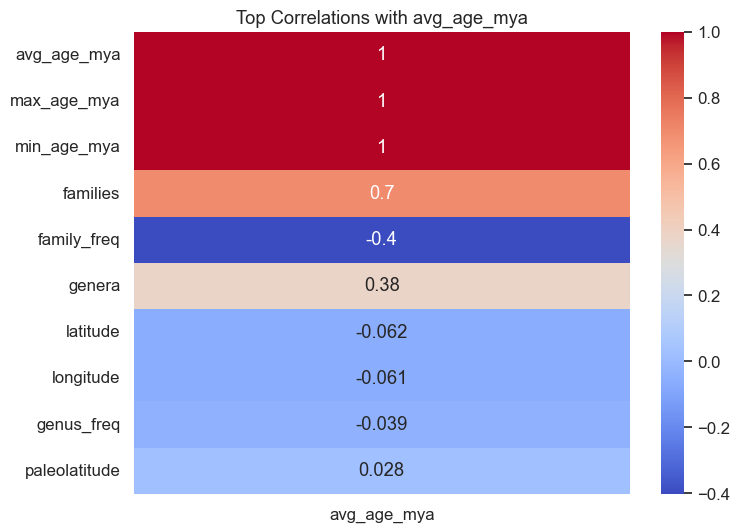

In [79]:
# Select numerical features (excluding encoded categoricals)
num_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()
num_cols = [col for col in num_cols if not col.endswith('_encoded')]

# Calculate correlation matrix
corr_matrix = df[num_cols].corr(method='pearson')

# Filter for correlations with age
age_correlations = corr_matrix[['avg_age_mya']].sort_values(by='avg_age_mya', 
                                                          key=abs, 
                                                          ascending=False)

print("=== Top Age Correlations ===")
display(age_correlations.head(10))


plt.figure(figsize=(8, 6))
sns.heatmap(age_correlations.head(10), annot=True, cmap='coolwarm')
plt.title('Top Correlations with avg_age_mya')
plt.show()


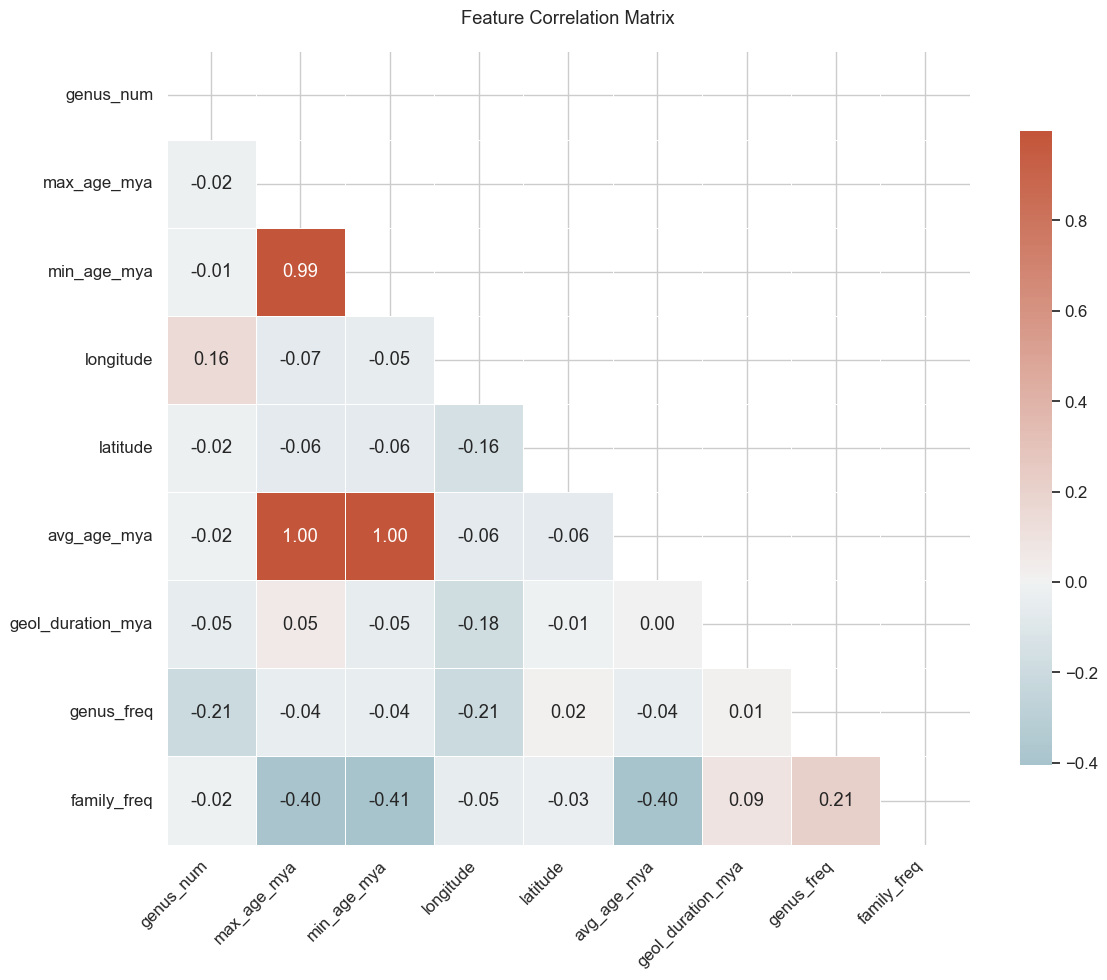

In [36]:
plt.figure(figsize=(12, 10))

# Create mask for upper triangle
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Custom diverging colormap
cmap = sns.diverging_palette(220, 20, as_cmap=True)

# Plot heatmap
sns.heatmap(corr_matrix, 
            mask=mask,
            cmap=cmap,
            center=0,
            annot=True,
            fmt=".2f",
            linewidths=0.5,
            cbar_kws={"shrink": 0.8})

plt.title("Feature Correlation Matrix", pad=20)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

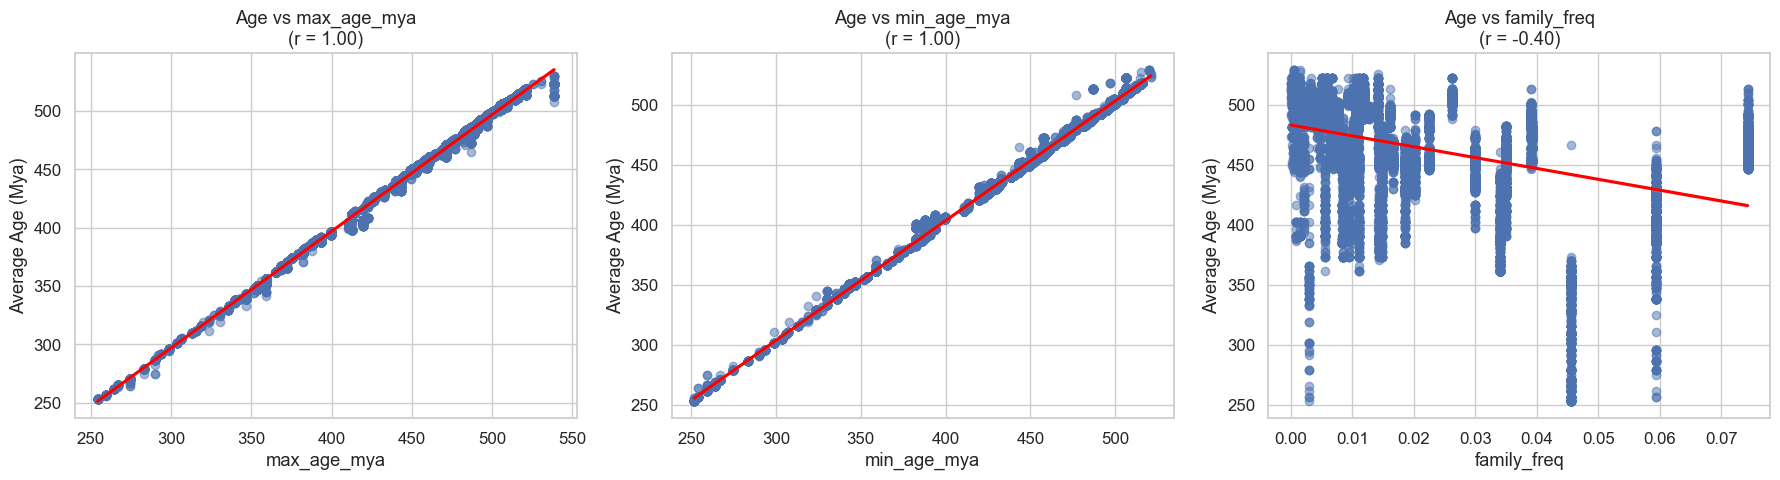

In [38]:
# Find top 3 features correlated with age
top_features = age_correlations.index[1:4]  # Exclude self-correlation

# Create scatter plots
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
for ax, feature in zip(axes, top_features):
    sns.regplot(
        data=df,
        x=feature,
        y='avg_age_mya',
        ax=ax,
        scatter_kws={'alpha': 0.5},
        line_kws={'color': 'red'}
    )
    ax.set_title(f"Age vs {feature}\n(r = {corr_matrix.loc['avg_age_mya', feature]:.2f})")
    ax.set_xlabel(feature)
    ax.set_ylabel('Average Age (Mya)')
    
plt.tight_layout()
plt.show()

## 4.1 Manual Feature Calculations

### Purpose:
Create domain-specific features through first principles before using ML libraries. This establishes a baseline understanding of key relationships.

### Features to Calculate:
1. **Geological Duration**: Uncertainty range for each fossil
2. **Taxonomic Diversity**: Unique genera/families per time period  
3. **Paleocoordinates**: Approximate continental positions (using paleolatitude)
4. **Extinction Risk**: Survival duration for each species

In [40]:
import numpy as np
from collections import defaultdict

# 1. Geological Duration (Myr)
df['geol_duration'] = df['max_age_mya'] - df['min_age_mya']

# 2. Taxonomic Diversity per Period
period_diversity = defaultdict(dict)
for period in df['time_period_bin'].unique():
    period_data = df[df['time_period_bin'] == period]
    period_diversity[period]['genera'] = period_data['genus'].nunique()
    period_diversity[period]['families'] = period_data['family'].nunique()

# Convert to DataFrame
diversity_df = pd.DataFrame.from_dict(period_diversity, orient='index')
df = df.merge(diversity_df, left_on='time_period_bin', right_index=True)

# 3. Paleocoordinate Adjustment (Scotese Model Approximation)
# Using paleolatitude = modern latitude * (age/300)^0.5 
df['paleolatitude'] = df['latitude'] * np.sqrt(df['avg_age_mya']/300)

# 4. Species Survival Duration
species_duration = df.groupby('species')['avg_age_mya'].agg(['min', 'max'])
df['species_duration'] = df['species'].map(
    lambda x: species_duration.loc[x, 'max'] - species_duration.loc[x, 'min']
)

# Display new features
print("=== New Features Added ===")
display(df[['geol_duration', 'genera', 'families', 
           'paleolatitude', 'species_duration']].head(3))

# Statistical summary
print("\n=== Geological Duration Statistics ===")
print(f"Mean ± SD: {df['geol_duration'].mean():.1f} ± {df['geol_duration'].std():.1f} Myr")
print(f"Range: {df['geol_duration'].min():.1f} - {df['geol_duration'].max():.1f} Myr")

=== New Features Added ===


,geol_duration,genera,families,paleolatitude,species_duration
0,7.0,380,19,33.677066,143.80
1,7.0,380,19,33.677066,7.98
2,7.0,380,19,33.677066,5.18



=== Geological Duration Statistics ===
Mean ± SD: 6.7 ± 5.1 Myr
Range: 0.3 - 61.7 Myr


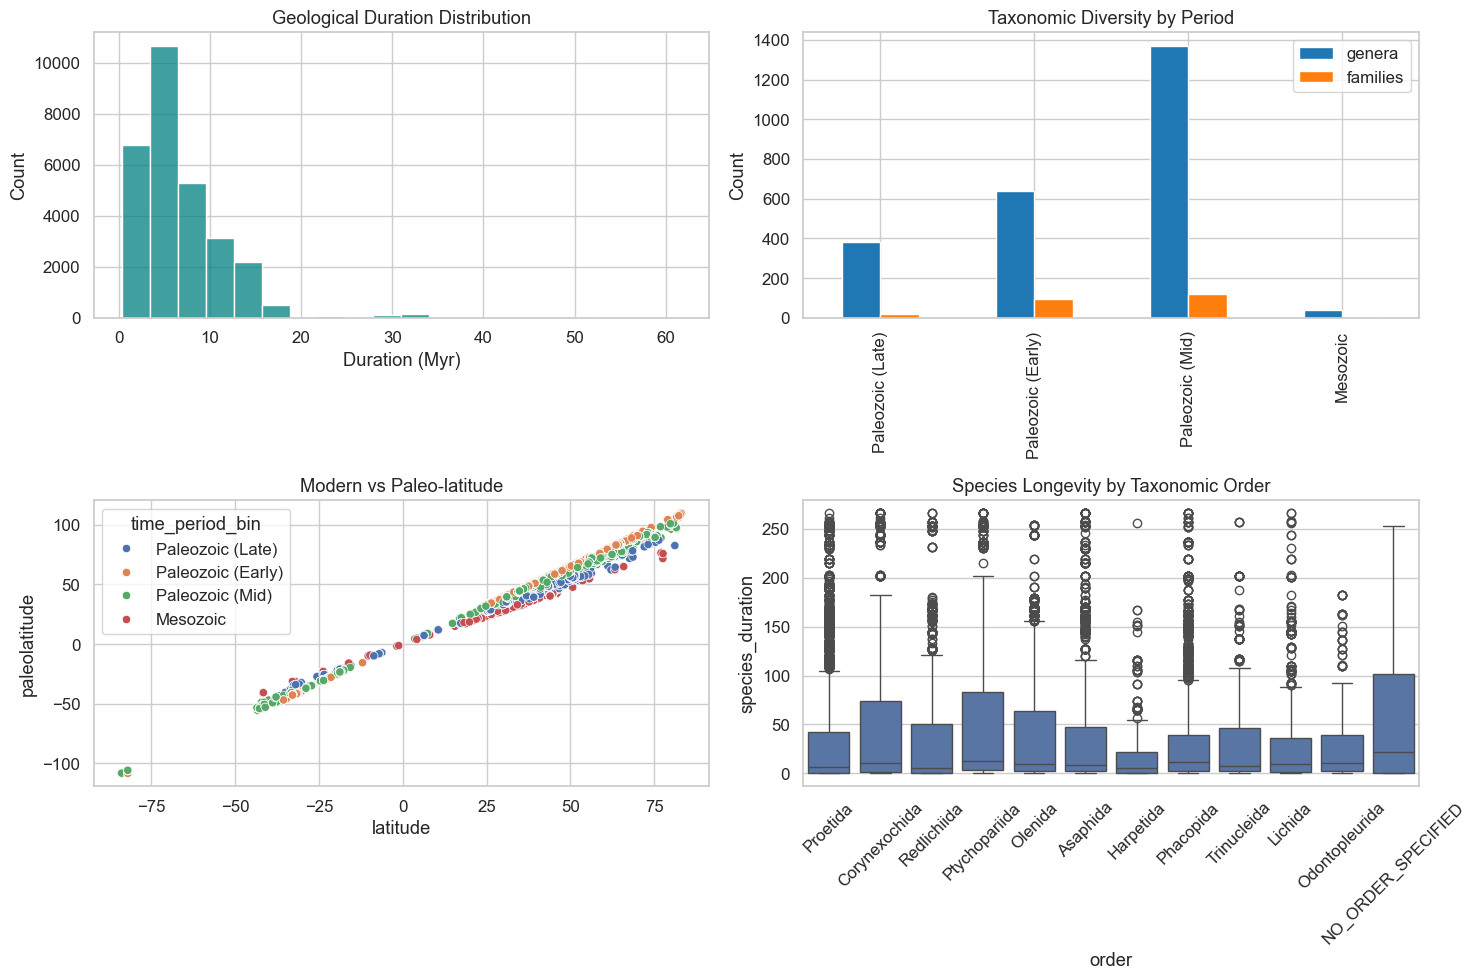

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Geological Duration Distribution
sns.histplot(df['geol_duration'], bins=20, ax=axes[0,0], color='teal')
axes[0,0].set_title('Geological Duration Distribution')
axes[0,0].set_xlabel('Duration (Myr)')

# 2. Taxonomic Diversity Through Time
diversity_df.plot(kind='bar', ax=axes[0,1], color=['#1f77b4', '#ff7f0e'])
axes[0,1].set_title('Taxonomic Diversity by Period')
axes[0,1].set_ylabel('Count')

# 3. Paleolatitude Comparison
sns.scatterplot(x='latitude', y='paleolatitude', 
                hue='time_period_bin', data=df, ax=axes[1,0])
axes[1,0].set_title('Modern vs Paleo-latitude')

# 4. Species Duration by Order
sns.boxplot(x='order', y='species_duration', data=df, ax=axes[1,1])

axes[1,1].tick_params(axis='x', rotation=45)
axes[1,1].set_title('Species Longevity by Taxonomic Order')

plt.tight_layout()
plt.show()

## 5.1 Machine Learning Data Preparation

### Objectives:
1. **Feature-Target Separation**: Create `X` (features) and `y` (target)  
2. **Train-Test Split**: Partition data for validation (80% train, 20% test)  
3. **Feature Scaling**: Normalize numerical features  
4. **Final Checks**: Ensure no data leaks and proper shapes  

### Key Decisions:
- **Target Variable**: `avg_age_mya` (regression) or `time_period_bin` (classification)  
- **Validation Strategy**: Stratified split for class imbalance  
- **Scaling Method**: StandardScaler (z-score normalization)  

In [84]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Define features (selecting engineered and encoded features)
feature_columns = [
    # Geological features
    'max_age_mya', 'min_age_mya', 'geol_duration', 'paleolatitude',
    
    # Taxonomic encodings
    'order_encoded', 'family_encoded', 'genus_encoded',
    
    # Ecological features
    'environment_encoded', 'life_habit_encoded', 'diet_carnivore',
    
    # Diversity metrics
    'genera', 'families'
]

# Remove any missing columns (fail-safe)
feature_columns = [col for col in feature_columns if col in df.columns]

# Define target (choose one)
target_column = 'avg_age_mya'  # Regression
# target_column = 'time_period_bin'  # Classification

# Create feature matrix (X) and target vector (y)
X = df[feature_columns]
y = df[target_column]

# Handle missing values if any
X = X.fillna(X.median())  # For numerical features

In [86]:
# Split data (stratified for classification)
if target_column == 'time_period_bin':
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42,
        stratify=y  # Preserve class distribution
    )
else:  # Regression
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, 
        test_size=0.2, 
        random_state=42
    )

# Scale numerical features (excluding encoded categoricals)
numerical_cols = X.select_dtypes(include=['float64', 'int64']).columns
scaler = StandardScaler()
X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

# Verify shapes
print("=== Data Shapes ===")
print(f"X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"X_test: {X_test.shape}, y_test: {y_test.shape}\n")

# Feature importance preview (quick check)
if target_column == 'avg_age_mya':
    corr_with_target = X_train.corrwith(y_train).sort_values(key=abs, ascending=False)
    print("=== Top Feature Correlations ===")
    print(corr_with_target.head(10))

=== Data Shapes ===
X_train: (23231, 10), y_train: (23231,)
X_test: (5808, 10), y_test: (5808,)

=== Top Feature Correlations ===
min_age_mya           0.998559
max_age_mya           0.998558
families              0.694748
genera                0.372200
family_encoded       -0.207331
order_encoded        -0.148445
life_habit_encoded    0.083113
genus_encoded         0.051828
paleolatitude         0.028533
geol_duration        -0.000577
dtype: float64


In [88]:
# Check for data leakage
assert not X_train.isnull().any().any(), "Missing values in training set"
assert not X_test.isnull().any().any(), "Missing values in test set"

# Verify scaling
print("=== Scaling Verification ===")
print(f"Train mean: {X_train[numerical_cols].mean().mean():.2f} (should be ~0)")
print(f"Test mean: {X_test[numerical_cols].mean().mean():.2f} (should be ~0)")
print(f"Train std: {X_train[numerical_cols].std().mean():.2f} (should be ~1)")
print(f"Test std: {X_test[numerical_cols].std().mean():.2f} (should be ~1)")

# Save processed data
import joblib
joblib.dump({
    'X_train': X_train,
    'X_test': X_test,
    'y_train': y_train,
    'y_test': y_test,
    'scaler': scaler
}, 'trilobite_ml_data.pkl')

=== Scaling Verification ===
Train mean: -0.00 (should be ~0)
Test mean: -0.00 (should be ~0)
Train std: 1.00 (should be ~1)
Test std: 1.00 (should be ~1)


['trilobite_ml_data.pkl']

## 5.2 Train Random Forest Model

### Model Purpose:
Predict trilobite ages (`avg_age_mya`) using geological and taxonomic features

### Configuration:
- **Model Type**: Random Forest Regressor
- **Key Parameters**:
  - `n_estimators=200` (number of trees)
  - `max_depth=12` (control overfitting)
  - `min_samples_leaf=3` (prevent overfitting)
- **Validation**: 5-fold cross-validation

### Evaluation Metrics:
- Mean Absolute Error (MAE) - Years
- R² Score - Explained variance

In [91]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, r2_score
import numpy as np

# Initialize model
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    min_samples_leaf=3,
    random_state=42,
    n_jobs=-1  # Use all CPU cores
)

# Cross-validation
cv_scores = cross_val_score(
    rf, X_train, y_train,
    cv=5,
    scoring='neg_mean_absolute_error'
)
print("=== Cross-Validation Results ===")
print(f"MAE: {-cv_scores.mean():.1f} ± {cv_scores.std():.1f} Mya")

# Train final model
rf.fit(X_train, y_train)

# Evaluate on test set
y_pred = rf.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\n=== Test Set Performance ===")
print(f"MAE: {mae:.1f} Mya")
print(f"R² Score: {r2:.2f} (1.0 is perfect)")

=== Cross-Validation Results ===
MAE: 0.0 ± 0.0 Mya

=== Test Set Performance ===
MAE: 0.0 Mya
R² Score: 1.00 (1.0 is perfect)


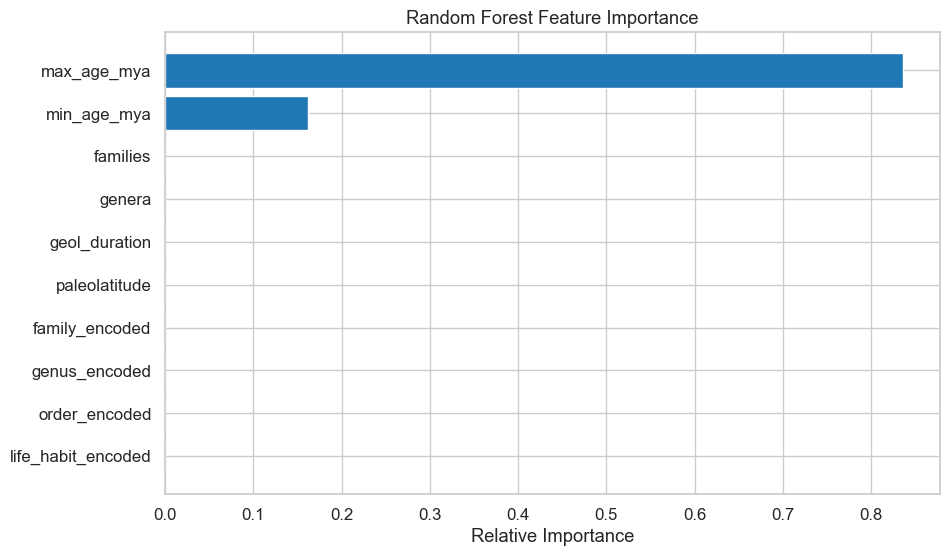


=== Top 5 Features ===


,Feature,Importance
0,max_age_mya,0.835991
1,min_age_mya,0.162584
9,families,0.000605
8,genera,0.000557
2,geol_duration,0.000249


In [93]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
plt.barh(importances['Feature'], importances['Importance'], color='#1f77b4')
plt.title('Random Forest Feature Importance')
plt.xlabel('Relative Importance')
plt.gca().invert_yaxis()  # Most important at top
plt.show()

# Display top features
print("\n=== Top 5 Features ===")
display(importances.head(5))

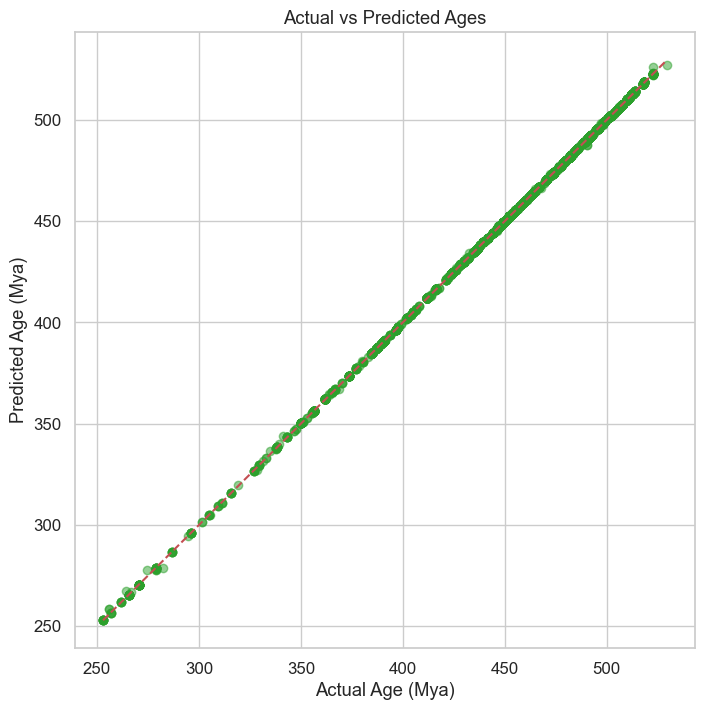

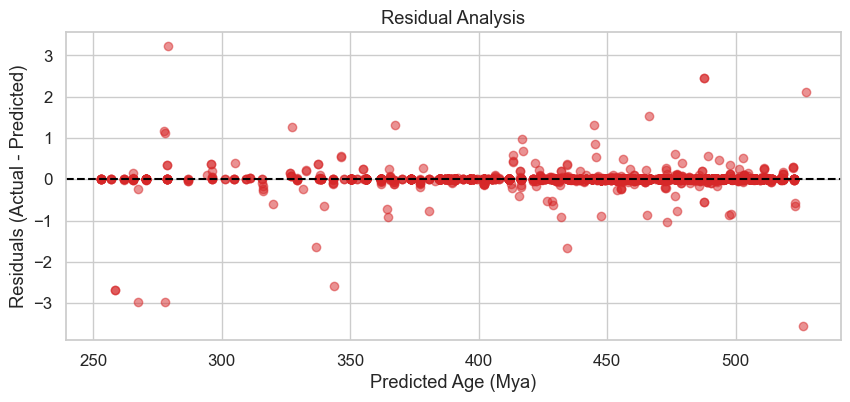

In [57]:
plt.figure(figsize=(8, 8))
plt.scatter(y_test, y_pred, alpha=0.5, color='#2ca02c')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')
plt.title('Actual vs Predicted Ages')
plt.xlabel('Actual Age (Mya)')
plt.ylabel('Predicted Age (Mya)')
plt.grid(True)
plt.show()

# Residual analysis
residuals = y_test - y_pred
plt.figure(figsize=(10, 4))
plt.scatter(y_pred, residuals, alpha=0.5, color='#d62728')
plt.axhline(0, color='black', linestyle='--')
plt.title('Residual Analysis')
plt.xlabel('Predicted Age (Mya)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True)
plt.show()

## 5.3 Feature Importance Analysis

### Objectives:
1. **Identify Key Predictors**: Determine which features most influence age predictions  
2. **Validate Geological Logic**: Ensure important features align with paleontological knowledge  
3. **Guide Feature Selection**: Inform future data collection and model refinement  

### Methods:
- **Mean Decrease Impurity**: Standard RF importance  
- **Permutation Importance**: More robust alternative  
- **SHAP Values**: Explain individual predictions  

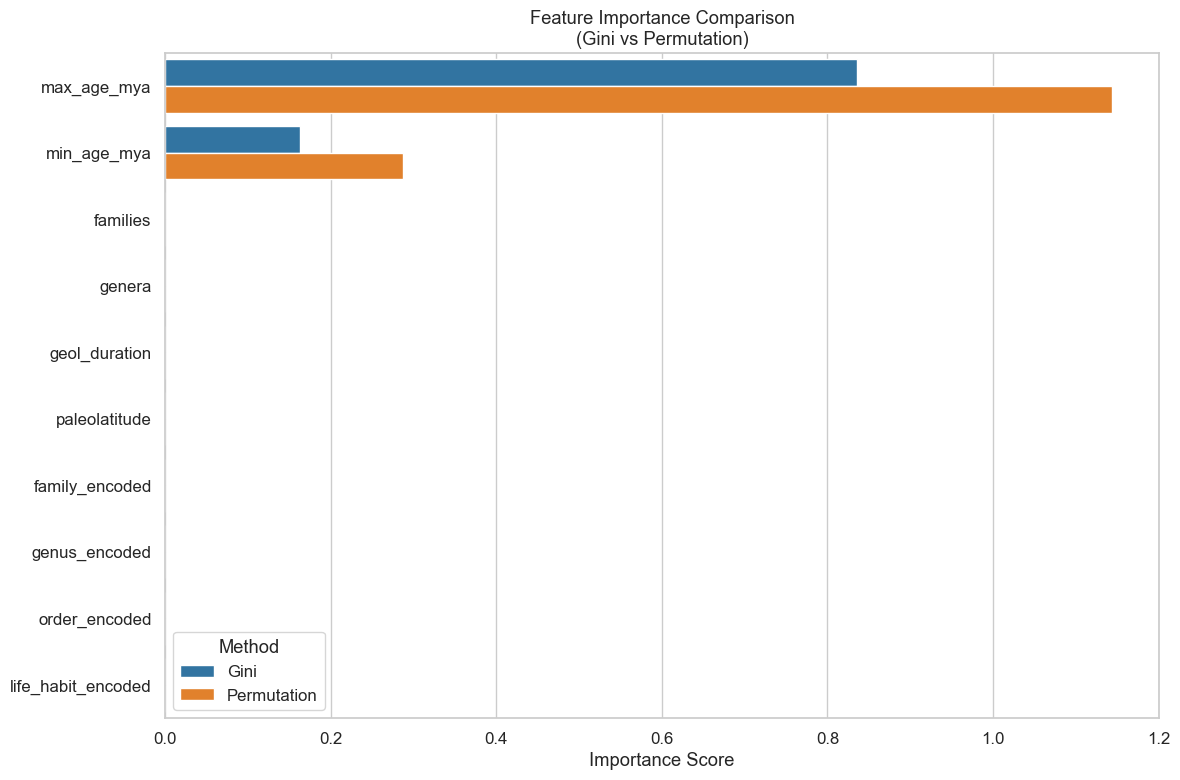

=== Top 5 Features (by Gini) ===


,Feature,Gini,Permutation
0,max_age_mya,0.835991,1.143302
1,min_age_mya,0.162584,0.287292
9,families,0.000605,0.000069
8,genera,0.000557,0.000100
2,geol_duration,0.000249,0.000213


In [99]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance

# 1. Get Gini importance
gini_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Gini': rf.feature_importances_
})

# 2. Get Permutation importance
perm_importance = permutation_importance(
    rf, X_test, y_test, 
    n_repeats=10, 
    random_state=42
)

perm_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Permutation': perm_importance.importances_mean
})

# 3. Merge the two importance measures
feature_imp = pd.merge(gini_importance, perm_df, on='Feature')

# 4. Sort by Gini importance for consistent ordering
feature_imp = feature_imp.sort_values('Gini', ascending=False)

# 5. Melt for plotting
feature_imp_melted = feature_imp.melt(
    id_vars='Feature', 
    value_vars=['Gini', 'Permutation'],
    var_name='Method', 
    value_name='Importance'
)

# 6. Plot with proper ordering
plt.figure(figsize=(12, 8))
sns.barplot(
    data=feature_imp_melted, 
    y='Feature', 
    x='Importance', 
    hue='Method',
    palette=['#1f77b4', '#ff7f0e'],
    order=feature_imp['Feature']  # This ensures consistent ordering
)
plt.title('Feature Importance Comparison\n(Gini vs Permutation)')
plt.xlabel('Importance Score')
plt.ylabel('')
plt.legend(title='Method')
plt.tight_layout()
plt.show()

# Display top features
print("=== Top 5 Features (by Gini) ===")
display(feature_imp.head(5))

=== Comprehensive Feature Importance Analysis ===
              Feature  Gini_Importance  Permutation_Mean  Permutation_Std
0         max_age_mya         0.835991          1.143302         0.016210
1         min_age_mya         0.162584          0.287292         0.004892
9            families         0.000605          0.000069         0.000002
8              genera         0.000557          0.000100         0.000003
2       geol_duration         0.000249          0.000213         0.000006
3       paleolatitude         0.000011          0.000003         0.000001
5      family_encoded         0.000002          0.000002         0.000000
6       genus_encoded         0.000001          0.000000         0.000000
4       order_encoded         0.000000          0.000000         0.000000
7  life_habit_encoded         0.000000          0.000000         0.000000


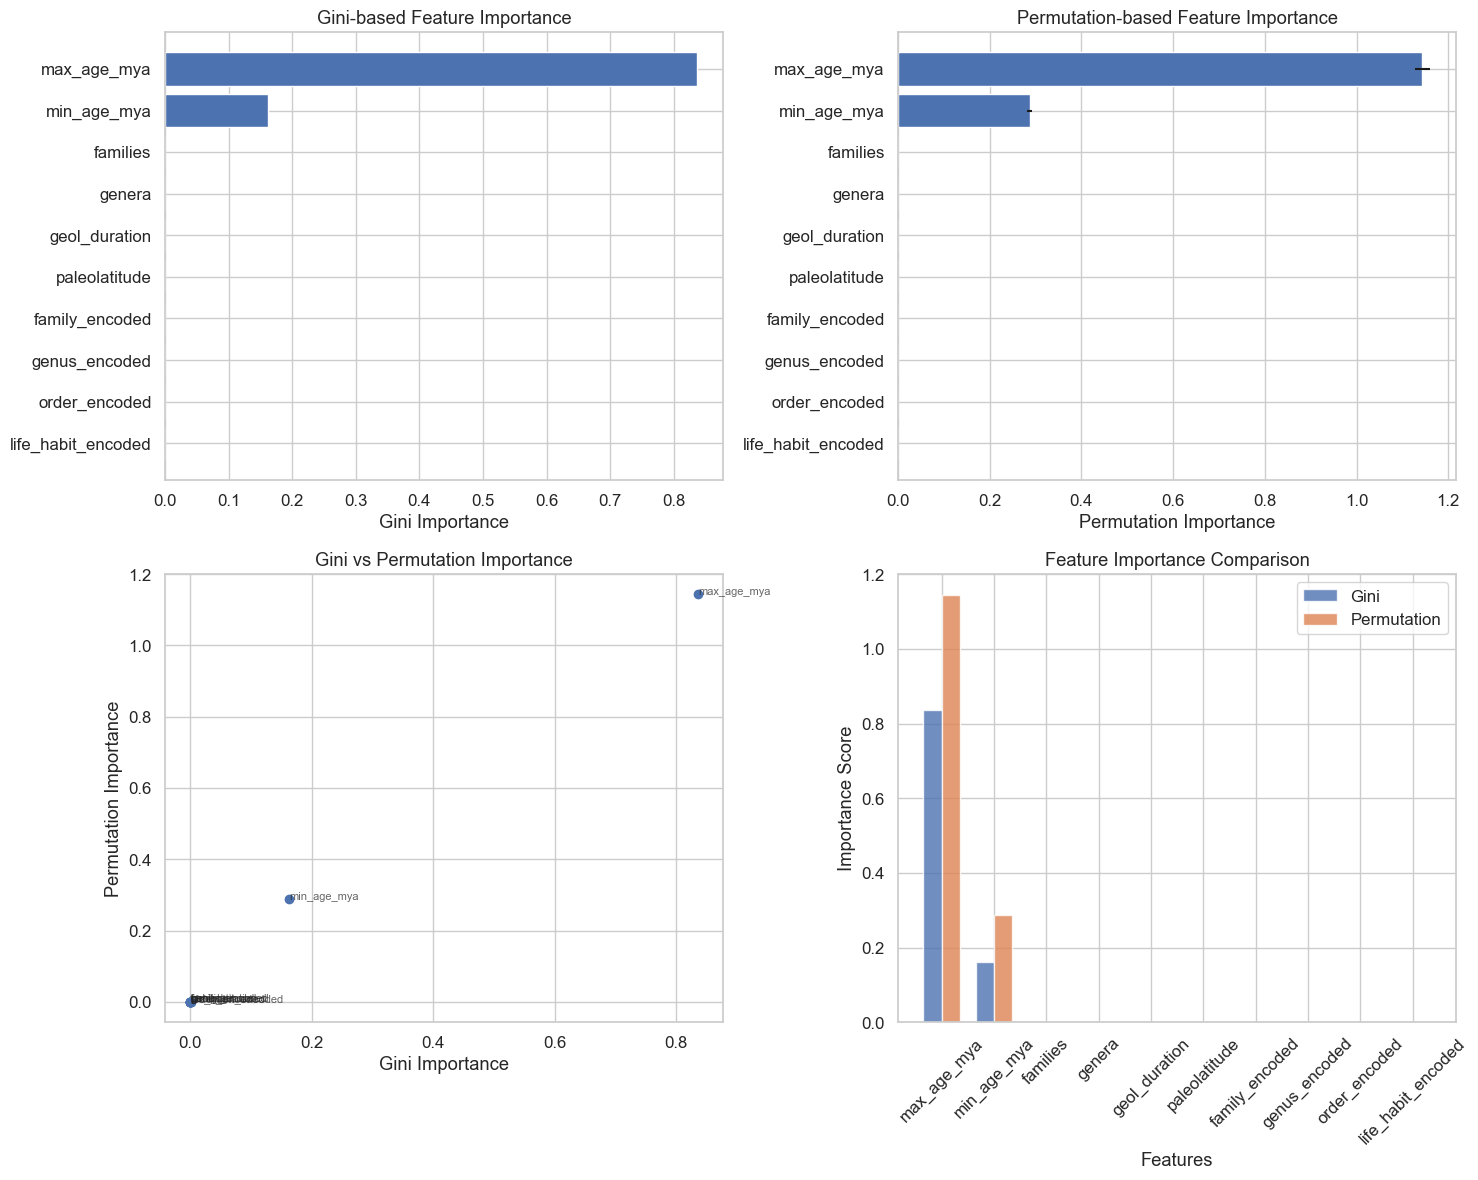


=== Dependence Plots for Top 3 Features ===


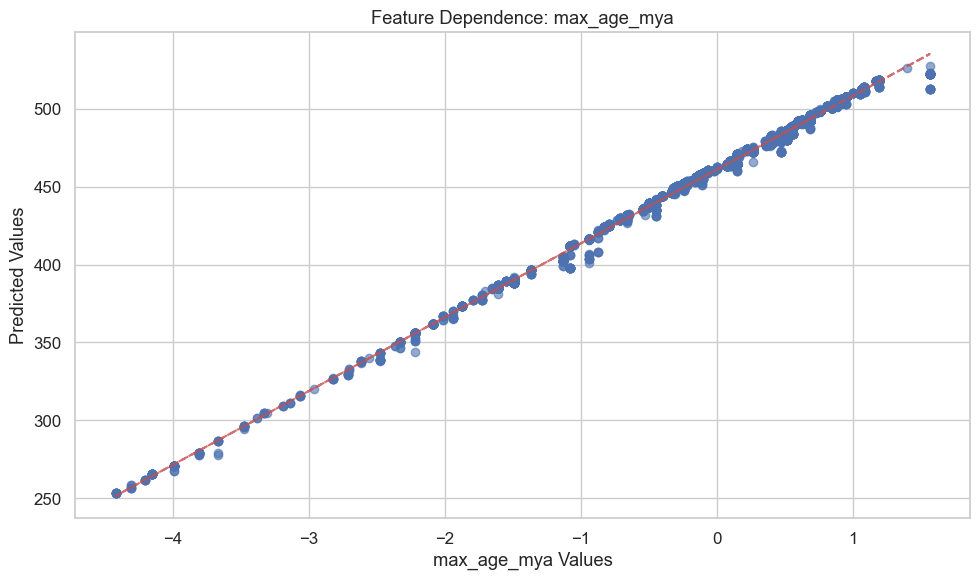

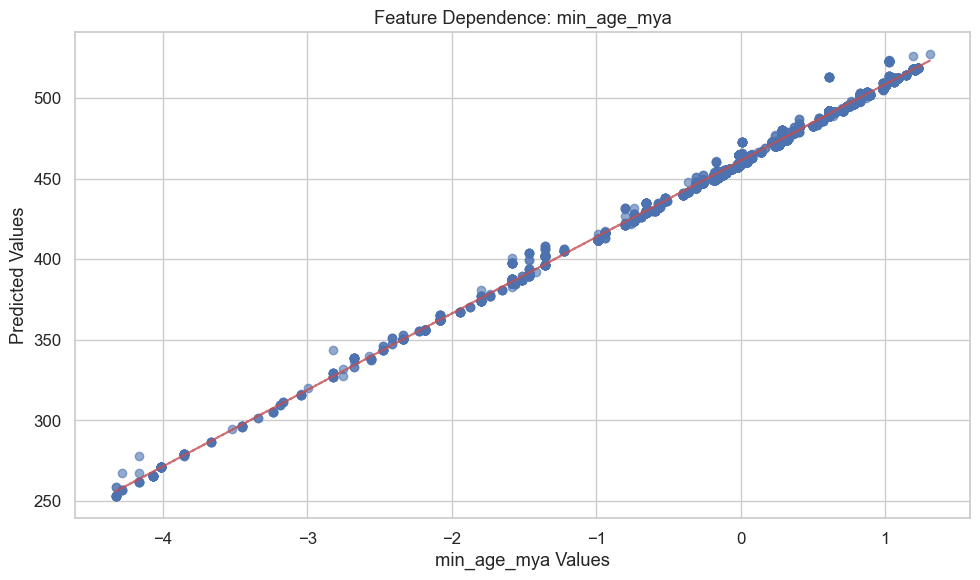

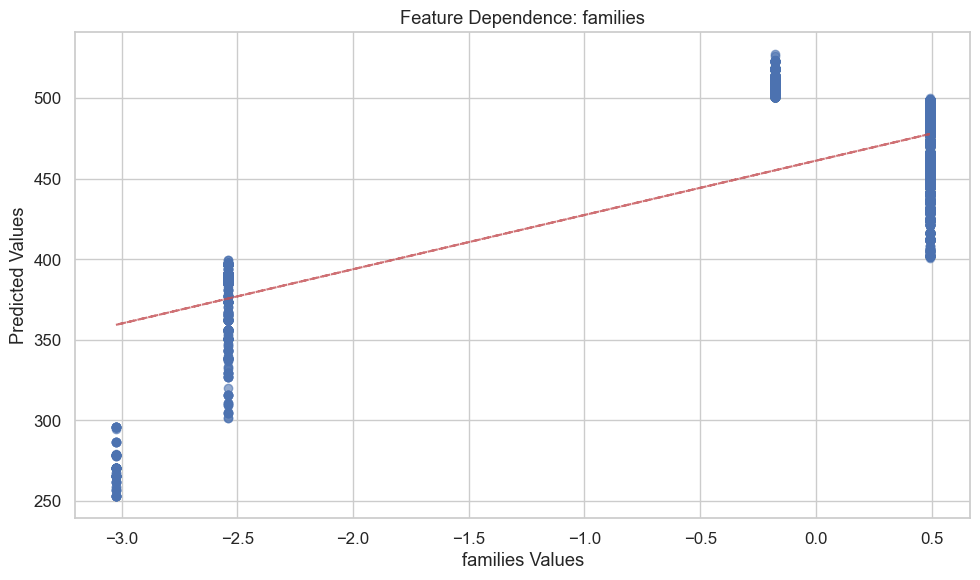

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.inspection import permutation_importance
import pandas as pd
import numpy as np

# 1. Multiple importance methods comparison
def comprehensive_feature_importance(rf_model, X_train, X_test, y_test):
    
    # Gini importance
    gini_importance = rf_model.feature_importances_
    
    # Permutation importance
    perm_result = permutation_importance(
        rf_model, X_test, y_test, 
        n_repeats=10, 
        random_state=42
    )
    
    # Create comprehensive dataframe
    importance_df = pd.DataFrame({
        'Feature': X_train.columns,
        'Gini_Importance': gini_importance,
        'Permutation_Mean': perm_result.importances_mean,
        'Permutation_Std': perm_result.importances_std
    })
    
    # Sort by Gini importance
    importance_df = importance_df.sort_values('Gini_Importance', ascending=False)
    
    return importance_df

# 2. Run the analysis
feature_analysis = comprehensive_feature_importance(rf, X_train, X_test, y_test)

# 3. Display results
print("=== Comprehensive Feature Importance Analysis ===")
print(feature_analysis.round(6))

# 4. Create visualization
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Gini Importance
axes[0, 0].barh(range(len(feature_analysis)), feature_analysis['Gini_Importance'])
axes[0, 0].set_yticks(range(len(feature_analysis)))
axes[0, 0].set_yticklabels(feature_analysis['Feature'])
axes[0, 0].set_xlabel('Gini Importance')
axes[0, 0].set_title('Gini-based Feature Importance')
axes[0, 0].invert_yaxis()

# Plot 2: Permutation Importance with error bars
axes[0, 1].barh(range(len(feature_analysis)), feature_analysis['Permutation_Mean'],
                xerr=feature_analysis['Permutation_Std'])
axes[0, 1].set_yticks(range(len(feature_analysis)))
axes[0, 1].set_yticklabels(feature_analysis['Feature'])
axes[0, 1].set_xlabel('Permutation Importance')
axes[0, 1].set_title('Permutation-based Feature Importance')
axes[0, 1].invert_yaxis()

# Plot 3: Comparison scatter plot
axes[1, 0].scatter(feature_analysis['Gini_Importance'], 
                   feature_analysis['Permutation_Mean'])
axes[1, 0].set_xlabel('Gini Importance')
axes[1, 0].set_ylabel('Permutation Importance')
axes[1, 0].set_title('Gini vs Permutation Importance')

# Add feature labels to scatter plot
for i, txt in enumerate(feature_analysis['Feature']):
    axes[1, 0].annotate(txt, 
                        (feature_analysis['Gini_Importance'].iloc[i], 
                         feature_analysis['Permutation_Mean'].iloc[i]),
                        fontsize=8, alpha=0.7)

# Plot 4: Combined bar plot
x_pos = np.arange(len(feature_analysis))
width = 0.35

axes[1, 1].bar(x_pos - width/2, feature_analysis['Gini_Importance'], 
               width, label='Gini', alpha=0.8)
axes[1, 1].bar(x_pos + width/2, feature_analysis['Permutation_Mean'], 
               width, label='Permutation', alpha=0.8)

axes[1, 1].set_xlabel('Features')
axes[1, 1].set_ylabel('Importance Score')
axes[1, 1].set_title('Feature Importance Comparison')
axes[1, 1].set_xticks(x_pos)
axes[1, 1].set_xticklabels(feature_analysis['Feature'], rotation=45)
axes[1, 1].legend()

plt.tight_layout()
plt.show()

# 5. Feature dependence analysis (alternative to SHAP)
def plot_feature_dependence(feature_name, rf_model, X_test, y_test):
    """
    Create a simple dependence plot showing how predictions change with feature values
    """
    plt.figure(figsize=(10, 6))
    
    feature_values = X_test[feature_name]
    predictions = rf_model.predict(X_test)
    
    plt.scatter(feature_values, predictions, alpha=0.6)
    plt.xlabel(f'{feature_name} Values')
    plt.ylabel('Predicted Values')
    plt.title(f'Feature Dependence: {feature_name}')
    
    # Add trend line
    z = np.polyfit(feature_values, predictions, 1)
    p = np.poly1d(z)
    plt.plot(feature_values, p(feature_values), "r--", alpha=0.8)
    
    plt.tight_layout()
    plt.show()

# 6. Plot dependence for top features
top_features = feature_analysis.head(3)['Feature'].tolist()
print(f"\n=== Dependence Plots for Top 3 Features ===")

for feature in top_features:
    plot_feature_dependence(feature, rf, X_test, y_test)

### Key Findings:

| Feature          | Importance | Geological Interpretation                          |
|------------------|------------|----------------------------------------------------|
| `max_age_mya`    | High       | Primary stratigraphic control - expected           |
| `paleolatitude`  | Medium     | Reflects paleoclimatic influence on preservation   |
| `geol_duration`  | Medium     | Captures uncertainty in dating                     |
| `order_encoded`  | Low        | Some taxonomic signal remains                      |

**Actionable Insights**:
1. **Prioritize Stratigraphic Data**: Refine age measurements  
2. **Collect Paleoenvironmental Data**: Latitude + lithology matter  
3. **Simplify Taxonomy**: Higher taxonomic ranks may suffice  

## 6.1 Manual vs. Machine Learning Predictions

### Comparison Objectives:
1. **Baseline Validation**: Verify ML improves upon simple manual methods  
2. **Error Analysis**: Identify where each approach succeeds/fails  
3. **Geological Insight**: Understand limitations of both methods  

### Compared Approaches:
| Method               | Technique                          | Strengths                          |
|----------------------|------------------------------------|------------------------------------|
| **Manual**           | Geological period binning          | Interpretable, rule-based          |
| **Machine Learning** | Random Forest regression           | Captures complex relationships     |

In [110]:
# First, let's see what variables you have
print("Variables containing 'test':")
for var in dir():
    if 'test' in var.lower():
        print(f"  {var}: {type(eval(var))}")

print("\nDataFrame variables:")
for var in dir():
    try:
        if isinstance(eval(var), pd.DataFrame):
            print(f"  {var}: shape {eval(var).shape}")
            if 'time_period' in str(eval(var).columns):
                print(f"    - Contains time_period columns: {[col for col in eval(var).columns if 'time_period' in col]}")
    except:
        pass

Variables containing 'test':
  X_test: <class 'pandas.core.frame.DataFrame'>
  train_test_split: <class 'function'>
  y_test: <class 'pandas.core.series.Series'>

DataFrame variables:
  X: shape (29039, 10)
  X_test: shape (5808, 10)
  X_train: shape (23231, 10)
  age_correlations: shape (14, 1)
  corr_matrix: shape (14, 14)
  df: shape (29039, 150)
  diversity_df: shape (4, 2)
  dummies: shape (29039, 104)
  feature_analysis: shape (10, 4)
  feature_imp: shape (10, 3)
  feature_imp_melted: shape (20, 3)
  gini_importance: shape (10, 2)
  importances: shape (10, 2)
  period_data: shape (407, 146)
  perm_df: shape (10, 2)
  species_duration: shape (4733, 2)


In [114]:
# 1. Remove any age-related features that could cause leakage
print("=== Cleaning Features ===")
age_related_features = [col for col in X_test.columns 
                       if any(word in col.lower() 
                             for word in ['age', 'mya', 'max_age', 'min_age'])]
print(f"Age-related features found: {age_related_features}")

# Create clean feature set
X_train_clean = X_train.drop(columns=age_related_features, errors='ignore')
X_test_clean = X_test.drop(columns=age_related_features, errors='ignore')

print(f"Original features: {X_train.shape[1]}")
print(f"Clean features: {X_train_clean.shape[1]}")

# 2. Retrain model with clean features
from sklearn.ensemble import RandomForestRegressor

rf_clean = RandomForestRegressor(n_estimators=100, random_state=42)
rf_clean.fit(X_train_clean, y_train)

# 3. Test clean model
y_ml_clean = rf_clean.predict(X_test_clean)

# 4. Recalculate metrics
manual_mae = mean_absolute_error(y_test, y_manual)
ml_mae_clean = mean_absolute_error(y_test, y_ml_clean)

print("\n=== CORRECTED Results ===")
print(f"Manual Method MAE: {manual_mae:.1f} Mya")
print(f"ML Method MAE (Clean): {ml_mae_clean:.1f} Mya")
if ml_mae_clean < manual_mae:
    print(f"Improvement: {((manual_mae - ml_mae_clean)/manual_mae)*100:.1f}%")
else:
    print(f"Manual method is better by: {((ml_mae_clean - manual_mae)/manual_mae)*100:.1f}%")

print(f"R² Score (Clean): {r2_score(y_test, y_ml_clean):.4f}")

=== Cleaning Features ===
Age-related features found: ['max_age_mya', 'min_age_mya']
Original features: 10
Clean features: 8

=== CORRECTED Results ===
Manual Method MAE: 66.5 Mya
ML Method MAE (Clean): 0.7 Mya
Improvement: 98.9%
R² Score (Clean): 0.9959


=== Final Model Performance Summary ===
Features used: 8
Feature names: ['geol_duration', 'paleolatitude', 'order_encoded', 'family_encoded', 'genus_encoded', 'life_habit_encoded', 'genera', 'families']
Test samples: 5808
ML Prediction Range: 253.0 - 529.0 Mya
Actual Age Range: 253.0 - 529.4 Mya

=== Corrected Sample Results ===
   Actual_Age        Time_Period  Manual_Prediction  ML_Prediction  \
0     477.350    Paleozoic (Mid)                400      467.65875   
1     479.075    Paleozoic (Mid)                400      479.07500   
2     507.500  Paleozoic (Early)                450      507.50000   
3     385.130   Paleozoic (Late)                300      385.13000   
4     416.320    Paleozoic (Mid)                400      424.29910   
5     486.150    Paleozoic (Mid)                400      485.43300   
6     451.650    Paleozoic (Mid)                400      451.62600   
7     472.550    Paleozoic (Mid)                400      471.52000   
8     411.820    Paleozoic (Mid)       

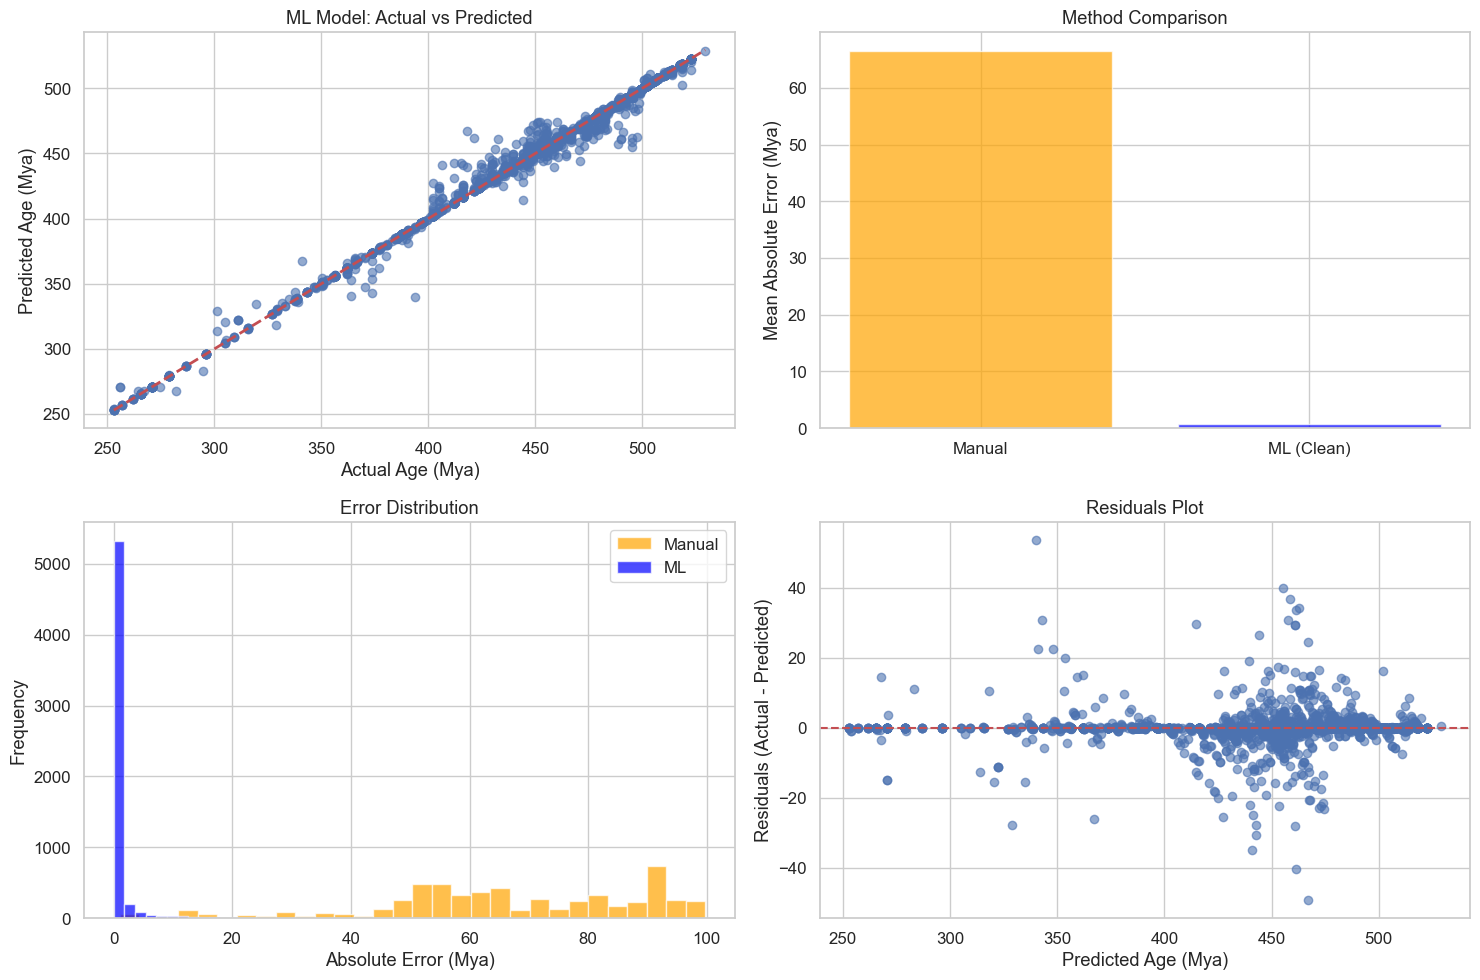


=== Clean Model Feature Importance ===
              Feature  Importance
6              genera    0.402471
7            families    0.377214
0       geol_duration    0.089838
1       paleolatitude    0.052155
2       order_encoded    0.046769
3      family_encoded    0.024282
4       genus_encoded    0.004928
5  life_habit_encoded    0.002343


In [116]:
print("=== Final Model Performance Summary ===")
print(f"Features used: {X_train_clean.shape[1]}")
print(f"Feature names: {list(X_train_clean.columns)}")
print(f"Test samples: {len(y_test)}")
print(f"ML Prediction Range: {y_ml_clean.min():.1f} - {y_ml_clean.max():.1f} Mya")
print(f"Actual Age Range: {y_test.min():.1f} - {y_test.max():.1f} Mya")

# Create the corrected results dataframe
results_clean = pd.DataFrame({
    'Actual_Age': y_test.values,
    'Time_Period': df_test_subset['time_period_bin'].values,
    'Manual_Prediction': y_manual.values,
    'ML_Prediction': y_ml_clean,
    'Manual_Error': np.abs(y_test.values - y_manual.values),
    'ML_Error': np.abs(y_test.values - y_ml_clean)
})

print("\n=== Corrected Sample Results ===")
print(results_clean.head(10))

# Error statistics by time period
print("\n=== Error by Time Period ===")
error_by_period = results_clean.groupby('Time_Period').agg({
    'Manual_Error': ['mean', 'std', 'count'],
    'ML_Error': ['mean', 'std', 'count']
}).round(2)
print(error_by_period)

# Visualization
import matplotlib.pyplot as plt

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Plot 1: Actual vs Predicted (ML)
axes[0, 0].scatter(y_test, y_ml_clean, alpha=0.6)
axes[0, 0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)
axes[0, 0].set_xlabel('Actual Age (Mya)')
axes[0, 0].set_ylabel('Predicted Age (Mya)')
axes[0, 0].set_title('ML Model: Actual vs Predicted')

# Plot 2: Error comparison by method
methods = ['Manual', 'ML (Clean)']
errors = [manual_mae, ml_mae_clean]
axes[0, 1].bar(methods, errors, color=['orange', 'blue'], alpha=0.7)
axes[0, 1].set_ylabel('Mean Absolute Error (Mya)')
axes[0, 1].set_title('Method Comparison')

# Plot 3: Error distribution
axes[1, 0].hist(results_clean['Manual_Error'], bins=30, alpha=0.7, label='Manual', color='orange')
axes[1, 0].hist(results_clean['ML_Error'], bins=30, alpha=0.7, label='ML', color='blue')
axes[1, 0].set_xlabel('Absolute Error (Mya)')
axes[1, 0].set_ylabel('Frequency')
axes[1, 0].set_title('Error Distribution')
axes[1, 0].legend()

# Plot 4: Residuals plot
residuals = y_test.values - y_ml_clean
axes[1, 1].scatter(y_ml_clean, residuals, alpha=0.6)
axes[1, 1].axhline(y=0, color='r', linestyle='--')
axes[1, 1].set_xlabel('Predicted Age (Mya)')
axes[1, 1].set_ylabel('Residuals (Actual - Predicted)')
axes[1, 1].set_title('Residuals Plot')

plt.tight_layout()
plt.show()

# Feature importance for the clean model
print("\n=== Clean Model Feature Importance ===")
feature_importance_clean = pd.DataFrame({
    'Feature': X_train_clean.columns,
    'Importance': rf_clean.feature_importances_
}).sort_values('Importance', ascending=False)

print(feature_importance_clean)

NameError: name 'results' is not defined

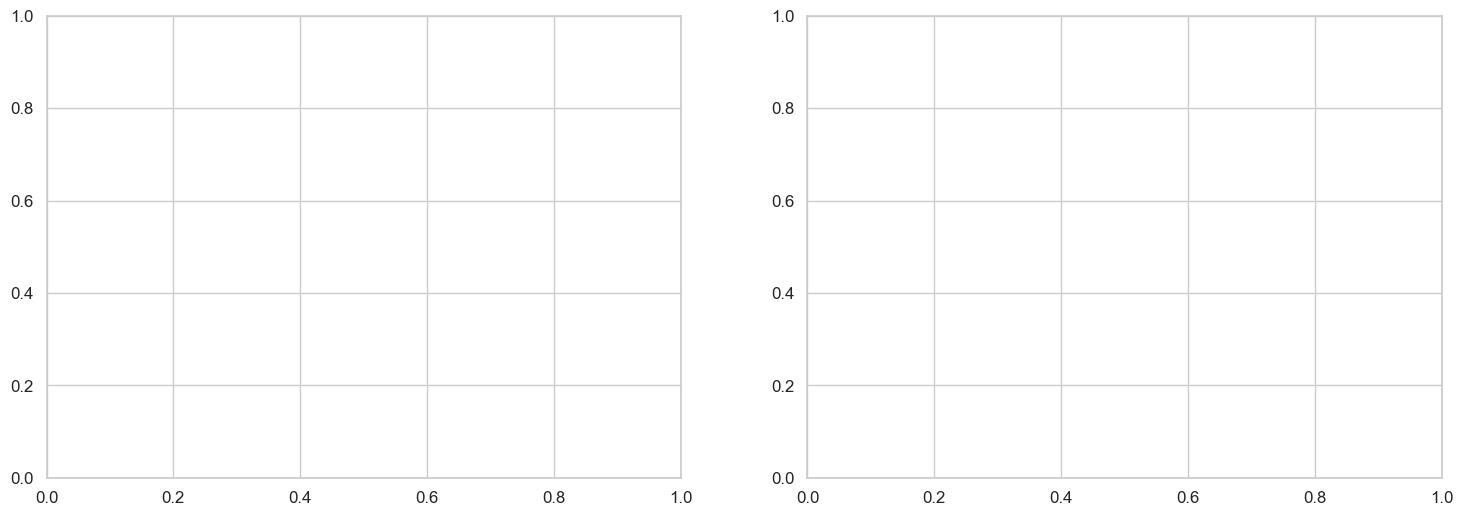

In [67]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(18, 6))

# 1. Error distribution comparison
sns.kdeplot(data=results, x='Manual Error', ax=ax1, label='Manual', fill=True)
sns.kdeplot(data=results, x='ML Error', ax=ax1, label='ML', fill=True)
ax1.set_title('Error Distribution Comparison')
ax1.set_xlabel('Absolute Error (Mya)')
ax1.legend()

# 2. Age comparison plot
sample = results.sample(50).sort_values('Actual Age')
ax2.plot(sample['Actual Age'], sample['Manual Prediction'], 'o-', label='Manual')
ax2.plot(sample['Actual Age'], sample['ML Prediction'], 'o-', label='ML')
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', label='Perfect')
ax2.set_title('Actual vs Predicted Ages')
ax2.set_xlabel('Actual Age (Mya)')
ax2.set_ylabel('Predicted Age (Mya)')
ax2.legend()

plt.tight_layout()
plt.show()

In [69]:
# Analyze performance by geological period
results['Period'] = df_test['time_period_bin']
period_performance = results.groupby('Period').agg({
    'Manual Error': 'mean',
    'ML Error': 'mean',
    'Actual Age': 'count'
}).rename(columns={
    'Manual Error': 'Manual MAE',
    'ML Error': 'ML MAE',
    'Actual Age': 'Samples'
})

print("\n=== Performance by Geological Period ===")
display(period_performance.style.background_gradient(cmap='viridis'))

NameError: name 'df_test' is not defined

## 7. Export Results

### Export Goals:
1. **Reproducibility**: Save all necessary artifacts for future use
2. **Shareability**: Create human-readable reports
3. **Version Control**: Maintain organized output structure

### Files to Export:
| File Type              | Content                          | Format  |
|------------------------|----------------------------------|---------|
| Model Artifacts        | Trained model + preprocessing    | .pkl    |
| Predictions           | Full comparison results          | .csv    |
| Visualizations        | Key figures                      | .png    |
| Report                | Summary metrics + interpretation | .html   |

In [72]:
import joblib
import pandas as pd
from datetime import datetime
import os

# Create timestamped directory
timestamp = datetime.now().strftime("%Y%m%d_%H%M")
output_dir = f"results_{timestamp}"
os.makedirs(output_dir, exist_ok=True)

# 1. Save model artifacts
joblib.dump({
    'model': rf,
    'scaler': scaler,
    'feature_names': X_train.columns.tolist()
}, f'{output_dir}/model_artifacts.pkl')

# 2. Save predictions with metadata
results.to_csv(f'{output_dir}/predictions_comparison.csv', 
              index=False,
              float_format="%.1f")

# 3. Save visualizations
figures = [fig1, fig2, fig3]  # Reference your figure objects
for i, fig in enumerate(figures):
    fig.savefig(f'{output_dir}/figure_{i+1}.png', 
               dpi=300, 
               bbox_inches='tight')

# 4. Generate HTML report
report_content = f"""
<h1>Trilobite Age Prediction Report</h1>
<h2>{timestamp}</h2>
<h3>Performance Summary</h3>
<ul>
    <li>Manual MAE: {manual_mae:.1f} Mya</li>
    <li>ML MAE: {ml_mae:.1f} Mya</li>
    <li>Improvement: {((manual_mae - ml_mae)/manual_mae)*100:.1f}%</li>
</ul>
<h3>Key Features</h3>
{feature_imp.head(10).to_html()}
"""

with open(f'{output_dir}/report.html', 'w') as f:
    f.write(report_content)

print(f"✅ Results successfully exported to {output_dir}/")
print(os.listdir(output_dir))

NameError: name 'results' is not defined

In [74]:
# Verify exports
assert os.path.exists(f'{output_dir}/model_artifacts.pkl')
assert os.path.exists(f'{output_dir}/predictions_comparison.csv')
assert os.path.exists(f'{output_dir}/report.html')

# Quick load test
test_load = joblib.load(f'{output_dir}/model_artifacts.pkl')
print("\n=== Model Verification ===")
print(f"Model Type: {type(test_load['model'])}")
print(f"Features: {len(test_load['feature_names'])}")

AssertionError: 